<a href="https://colab.research.google.com/github/abfaz/EDA_Hotel_booking/blob/main/hotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

**A dataset containing 119390 records across 32 features has been given with information regarding bookings of two hotels from July 2015 to August 2017. The main objective behind this project is to explore and analyze data to discover important factors that govern the bookings and give insights to hotel management.**

**This will be carried out by performing univariate analysis, bivariate analysis and correlation analysis of the dataset.**

## **Importing Libraries**

In [ ]:
# import all python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## **Reading Data**

In [ ]:
# Mounting drive
from google.colab import drive                    
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/dat/hotel_booking/Hotel Bookings.csv'
df=pd.read_csv(file_path)

## **Data Inspection**

In [ ]:
# Take a look of first five rows 
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape # count of rows and columns

(119390, 32)

In [ ]:
df.info() # information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Out of 32 columns, children, country, agent and company columns have null values.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df = df.copy() # create a copy of df

In [ ]:
list(hotel_df.columns) # list of all columns of dataframe

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

we will unterstand some columns by printing out their unique values.


In [ ]:
print(hotel_df.hotel.unique())
print(hotel_df.is_canceled.unique())
print(hotel_df.arrival_date_year.unique())
print(hotel_df.meal.unique())
print(hotel_df.market_segment.unique())
print(hotel_df.distribution_channel.unique())
print(hotel_df.children.unique()) # This column contains 0 as well as nan.






['Resort Hotel' 'City Hotel']
[0 1]
[2015 2016 2017]
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
[ 0.  1.  2. 10.  3. nan]


# **Data Cleaning**

Before doing EDA, We will remove/replace some ambiguos data by handling empty cells, duplicated rows if any present and convert columns into appropriate data types and in the last add some important columns.

**Removing Duplicate rows if any**

In [ ]:
hotel_df.duplicated().sum() # Total no.of duplicated rows

31994

In [ ]:
# Drop all duplicated rows
hotel_df.drop_duplicates(inplace=True)

In [ ]:
hotel_df.shape

(87396, 32)

**Handling empty cells**

In [ ]:
hotel_df.isnull().sum().sort_values(ascending=False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

There might be some cases when customer didn't book hotel via any agent or any company. so in this case we will replace nan values by 0 in these columns instead of dropping rows. 

In [ ]:
hotel_df[['company','agent']] = hotel_df[['company','agent']].fillna(0)

In [ ]:
hotel_df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

The column children contains 0 and nan both. 0 means no children were present in the group of customers who made transaction. so nan values occured due to error of recording data. we will replace nan values with mean value of children.

In [ ]:
hotel_df.children.fillna(hotel_df.children.mean(),inplace=True)

As country column has data type of strings of the countries of origin of customers, we will replace null values with 'others'

In [ ]:
hotel_df.country.fillna('others',inplace=True)

In [ ]:
# check if null values are removed
hotel_df.isnull().sum().sort_values(ascending=False)[:6]


hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [ ]:
hotel_df[hotel_df['adults']+hotel_df['children']+hotel_df['babies']==0].shape

(166, 32)

As there are some rows in which no adults,childs or babies present, we will remove them.  

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['children']+hotel_df['babies']==0].index,inplace=True)

**Convert columns to appropriate data types.**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# converting datatype of column 'reservation_status_date' to datetime.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

**Add some important columns**

In [ ]:
# Add total staying days in hotels 
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']

# Add total people as column, i.e. total people = adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']

In [ ]:
# Make new column "same_room" : 1 represent if reserved and assinged room were same otherwise 0
hotel_df['same_room'] = np.where(hotel_df['reserved_room_type']==hotel_df['assigned_room_type'],  '1', '0')


**Seperating Category and Numeric columns for EDA**

In [ ]:
cat_cols=["hotel","arrival_date_month","meal","country","market_segment","is_canceled","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","is_repeated_guest",'same_room']
num_cols = [c for c in hotel_df.columns if c not in cat_cols]
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'total_stay',
 'total_people']

## **Exploratory Data Analysis**

## **Univariate Analysis**

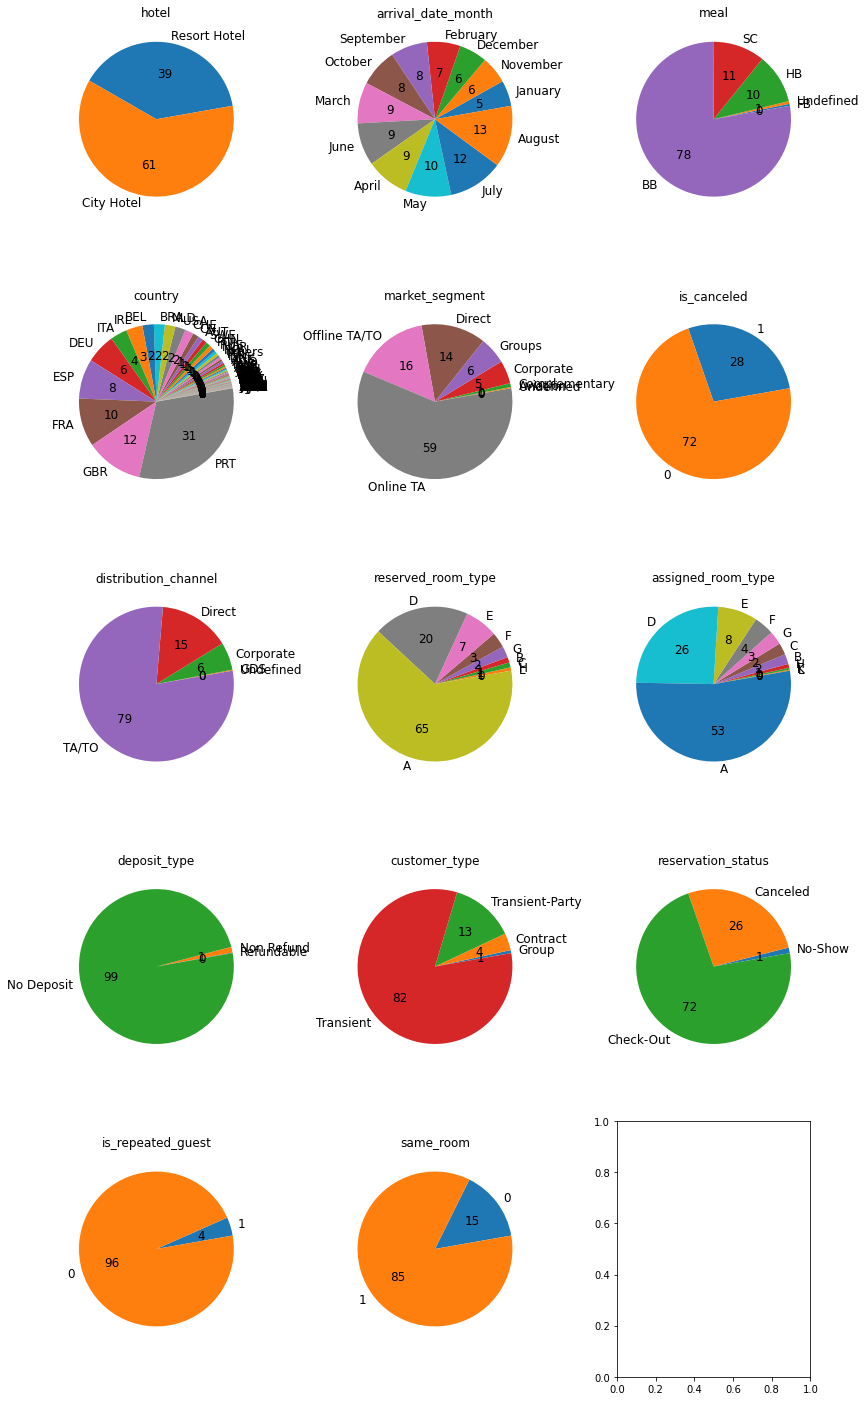

In [ ]:
# Plotting pie charts of value counts for category columns. 
fig, axes = plt.subplots(5, 3, figsize=(12, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, j in enumerate(hotel_df[cat_cols]):
    _ = hotel_df[j].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=j, autopct='%.0f', fontsize=12,startangle=10)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()


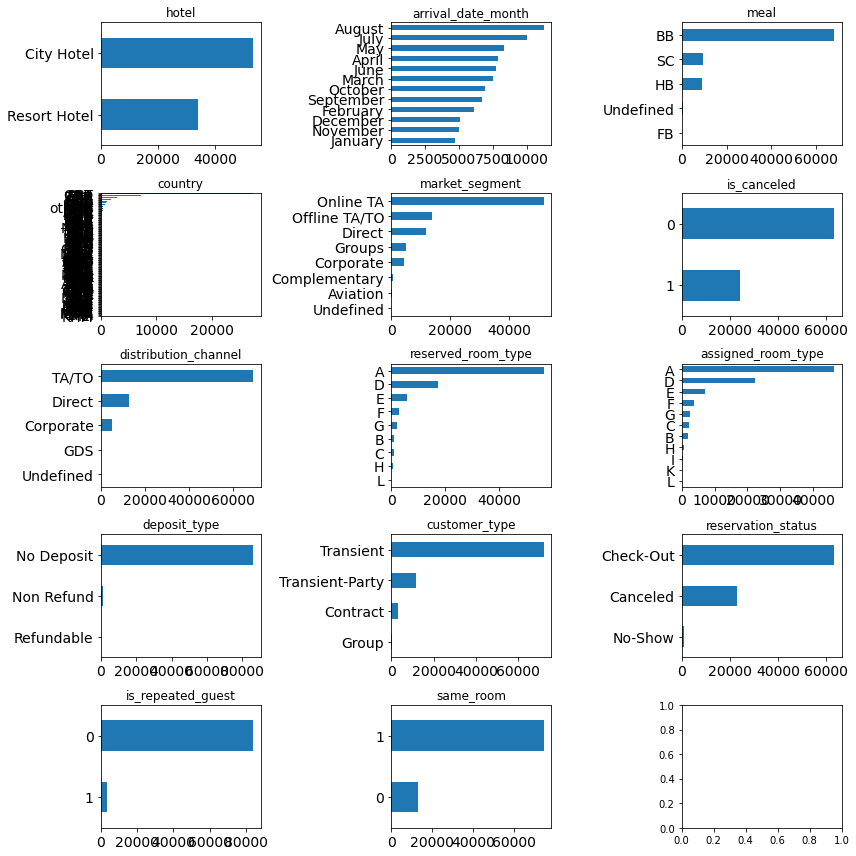

In [ ]:
# Plotting bar plots of value counts for different category columns.
fig, axes = plt.subplots(5, 3, figsize=(12, 12))
axes = [ax for row in axes for ax in row]

for i, j in enumerate(hotel_df[cat_cols]):
    _ = hotel_df[j].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=j, fontsize=14)
  
    
_ = plt.tight_layout()
_=plt.savefig('barplots.png')

**We can conclude from Univariate Pie Plots:**
  1. 61% is city hotel and 39% is resort hotel.
  2. Most People (13%) arrived in the month of August.
  3. Most preferred (78%) meal type is BB (Bed and Breakfast).
  4. Most People (31%) are from Portugal, followed by Germany, France, etc.
  5. Most demanded room type is A.
  6. 65% People reserved room A but only 53% assigned the same room.
  7. 59% market segment used is online TA, followed by offline TA/TO.
  8. 28% booking is cancelled.
  9. 79% distribution channel is TA/TO.
  10. 26% reservations are cancelled by guests.
  11. only 4% are repeated guest.
  12. 88% have reserved and assigned same room.
   




Question: What are the top 10 countries from which customers visit these hotels?

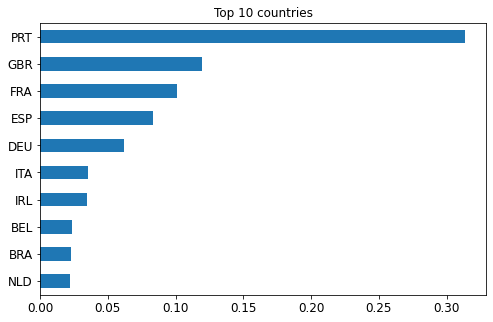

In [ ]:
# Country univariant analysis only for top 10 countries
fig, axes = plt.subplots(1, 1, figsize=(8, 5)) 
_ = hotel_df['country'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 countries', fontsize=12)
_=plt.savefig('top10.png')

Question: Which agent makes most no. of booking?



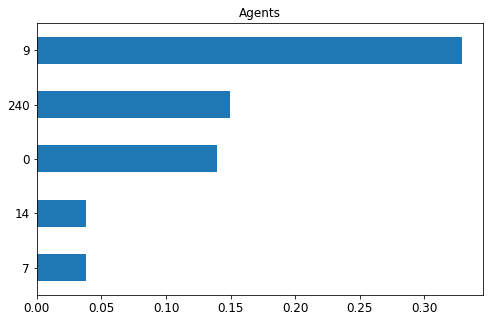

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5)) 
_ = hotel_df['agent'].value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind = 'barh', title='Agents', fontsize=12)
_=plt.savefig('agent.png')


Agent 9 has most booking. 0 represents that booking is not made by an agent.



## **Bivariant Analysis**




**Hotel wise analysis**

In [ ]:
groupby_hotel = hotel_df.groupby('hotel') # making groups by hotel

**Question1: Which hotel generates more revenue?**

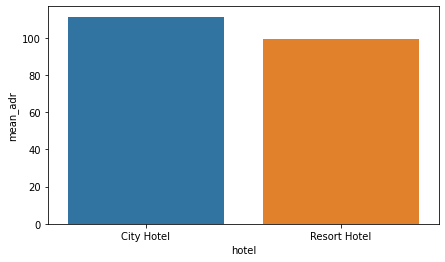

In [ ]:
a1 = groupby_hotel['adr'].agg(np.mean).reset_index().rename(columns={'adr':'mean_adr'}) # calculate mean adr for different hotel type
plt.figure(figsize = (7,4))
x1=sns.barplot(x = a1['hotel'], y = a1['mean_adr'] )
plt.savefig('revenue.png')
plt.show()




City type hotel has slightly higher mean_adr than resort type hotel. Therfore, city type hotel is making more revenue.

**Question2: Which hotel has longer waiting time?**



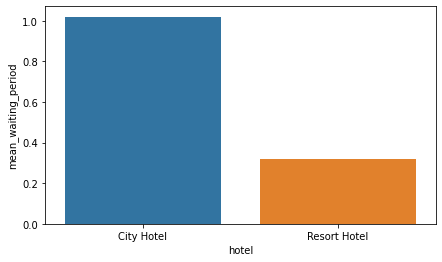

In [ ]:
a2 = groupby_hotel['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'mean_waiting_period'}) # calculate mean waiting period for different hotel type
plt.figure(figsize = (7,4))
sns.barplot(x = a2['hotel'], y = a2['mean_waiting_period'])
plt.savefig('wait_time.png')
plt.show()


City hotel has longer waiting time as it's busier than resort hotel.

**Question3: Which hotel has higher median lead time?**

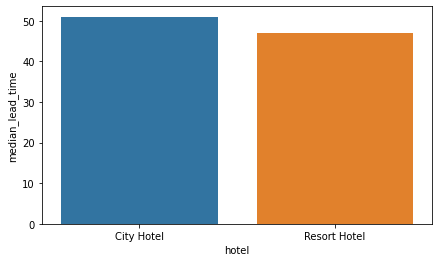

In [ ]:
a3 = groupby_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'}) # calculate meadian lead time for different hotel type
plt.figure(figsize = (7,4))
sns.barplot(x = a3['hotel'], y = a3['median_lead_time'])
plt.savefig('lead_time.png')
plt.show()


City hotel has slightly higher median lead time.

**Question4: Which hotel has higher booking cancellation rate?**

In [ ]:
# select subset of hotel_df whose booking is cancelled and then make groups by hotel
hotel_df_cancel = hotel_df[hotel_df['is_canceled'] == 1] 
groupby_cancel_hotel = hotel_df_cancel.groupby('hotel')
# finding the cancelled booking size for each type of hotel
d1 = groupby_cancel_hotel.size().reset_index().rename(columns={0:'total_cancelled_bookings'})
# finding total no. of bookings for each type of hotel
d2 = groupby_hotel.size().reset_index().rename(columns={0:'total_bookings'})
d3= pd.merge(d1,d2, on='hotel',) # merge d1&d2 on hotel
# find percentage of cancellation
d3['cancel_percent'] = round((d3['total_cancelled_bookings']/d3['total_bookings'])*100,2)
d3



,hotel,total_cancelled_bookings,total_bookings,cancel_percent
0,City Hotel,16035,53274,30.10
1,Resort Hotel,7974,33956,23.48


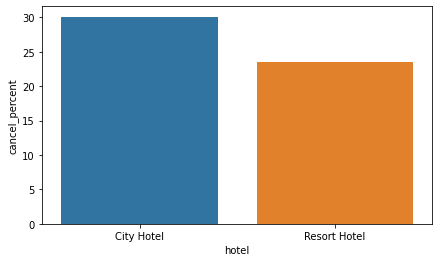

In [ ]:
plt.figure(figsize = (7,4))
sns.barplot(x = d3.hotel, y = d3['cancel_percent'])
plt.savefig('higher_cancel.png')
plt.show()


City type hotel has higher booking cancellation rate (30.10%) than resort type hotel (23.48%)

**Question5: Which hotel has higher chance that its customer will return for another stay?**

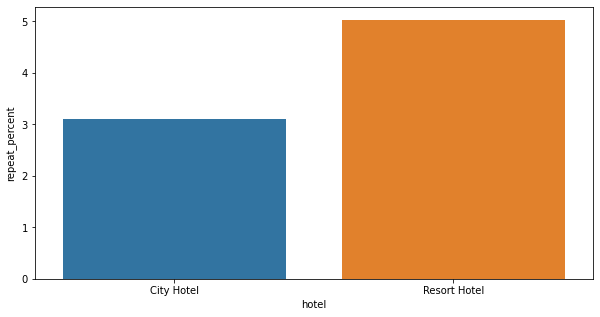

In [ ]:
# select subset of hotel_df who has repeated guests and then make groups by hotel
hotel_df_repeated_guest = hotel_df[hotel_df['is_repeated_guest'] == 1] 
groupby_repeated_guest = hotel_df_repeated_guest.groupby('hotel')
# finding the total repeated guest for each type of hotel
d1 = groupby_repeated_guest.size().reset_index().rename(columns={0:'total_repeated_guest'})
# finding total no. of bookings for each type of hotel
d2 = groupby_hotel.size().reset_index().rename(columns={0:'total_bookings'})
d3= pd.merge(d1,d2, on='hotel',) # merge d1&d2 on hotel
# find percentage of repeatation
d3['repeat_percent'] = round((d3['total_repeated_guest']/d3['total_bookings'])*100,2)


plt.figure(figsize = (10,5))
sns.barplot(x = d3.hotel, y = d3['repeat_percent'])
plt.savefig('return.png')
plt.show()




Resort hotel has slightly higher chance that its customeres will return for another stay.

**Question6: Which hotel room types has better adr?**

As there is an outlier present in  adr column, we will remove it for further EDA.

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True) # Removing outlier from adr column

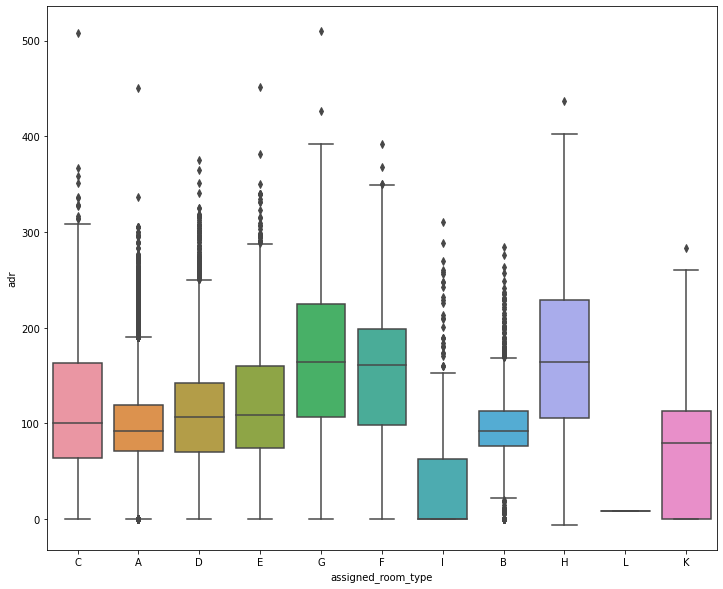

In [ ]:
plt.figure(figsize = (12,10))
sns.boxplot(x = hotel_df['assigned_room_type'], y = hotel_df['adr'])
plt.savefig('bar_adr.png')
plt.show()



As we already know room type A is the most demanded room. However, room types H, G and C are better adr rooms.

**Question7: How long do people stay at the hotels?**

In [ ]:
h = hotel_df[hotel_df['total_stay']<17] # select only those rows whose total staying days is less than 17

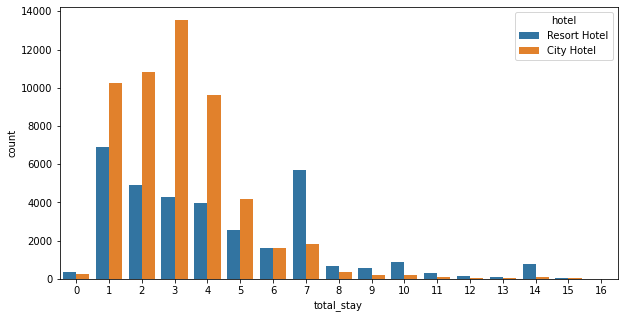

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = h['total_stay'], hue = h['hotel'])
plt.savefig('bar_time.png')
plt.show()


Most people commonly stay less than 5 days and prefer city hotel.

**Distribution Channel Wise Analysis**

In [ ]:
groupby_channel = hotel_df.groupby('distribution_channel') # making groups by channels

**Question8: Which distribution channel has longest average waiting time?**

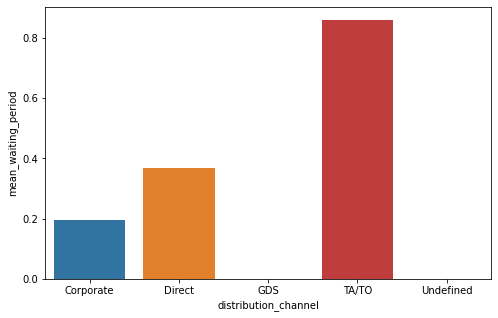

In [ ]:
a4 = groupby_channel['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'mean_waiting_period'}) # calculate mean waiting period for different distribution channel type
plt.figure(figsize = (8,5))
sns.barplot(x = a4['distribution_channel'], y = a4['mean_waiting_period'])
plt.savefig('bar_wait.png')
plt.show()


TA/TO channel has longest average waiting time.

**Question9: Which distribution channel has longer lead time?**

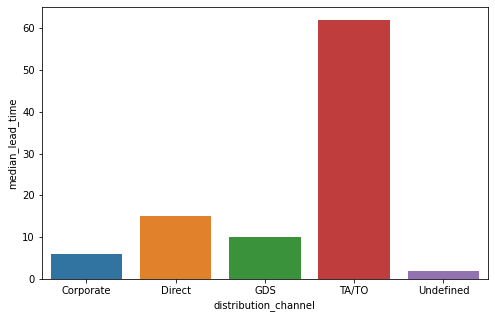

In [ ]:
a5 = groupby_channel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'}) # calculate meadian lead time for different distribution channels
plt.figure(figsize = (8,5))
sns.barplot(x = a5['distribution_channel'], y = a5['median_lead_time'])
plt.savefig('bar_long.png')
plt.show()


TA/TO channel has longest median lead time.

**Question10: Which distribution channel has highest booking cancellation rate?**

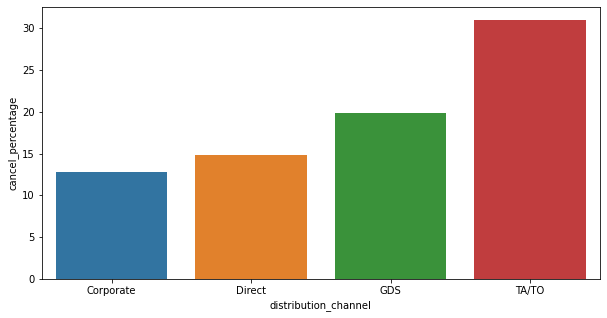

In [ ]:
# select subset of hotel_df whose booking is cancelled and then make groups by distribution channels
hotel_df_cancel = hotel_df[hotel_df['is_canceled'] == 1] 
groupby_cancel_channel = hotel_df_cancel.groupby('distribution_channel')
# finding the cancelled booking size for each distribution channel
d4 = groupby_cancel_channel.size().reset_index().rename(columns={0:'total_cancelled_bookings'})
# finding total no. of bookings for each type of channel
d5 = groupby_channel.size().reset_index().rename(columns={0:'total_bookings'})
d6= pd.merge(d4,d5, on='distribution_channel',) # merge d1&d2 on hotel
d6.drop(d6[(d6['distribution_channel']=='Undefined')].index,inplace=True) # remove undefined channel 


# find percentage of cancellation
d6['cancel_percentage'] = round((d6['total_cancelled_bookings']/d6['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = d6.distribution_channel, y = d6['cancel_percentage'])
plt.savefig('cancel.png')
plt.show()



TA/TO type channel has highest (~30%) booking cancellation rate.

**Time wise analysis**

**Question11: Which is the most visiting month?**

In [ ]:
hotel_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)] # selecting only resort hotel rows which are not cancelled
hotel_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)] # selecting only city hotel rows which are not cancelled

# Applying the value count method on arrival date months for resort and city hotel guests
hotel_resort_guest = hotel_resort['arrival_date_month'].value_counts().reset_index()
hotel_resort_guest.columns=['month','no of guests']
hotel_city_guest = hotel_city['arrival_date_month'].value_counts().reset_index()
hotel_city_guest.columns=['month','no of guests']

# Merge hotel_resort_guest and hotel_city_guest on month
hotel_guest= pd.merge(hotel_resort_guest,hotel_city_guest, on='month') 
hotel_guest.columns=['month','guests in resort hotel','guests in city hotel']
# Sort the data in Jan,Feb,March,...months 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_guest['month'] = pd.Categorical(hotel_guest['month'], categories=month, ordered=True)
hotel_guest = hotel_guest.sort_values('month').reset_index()



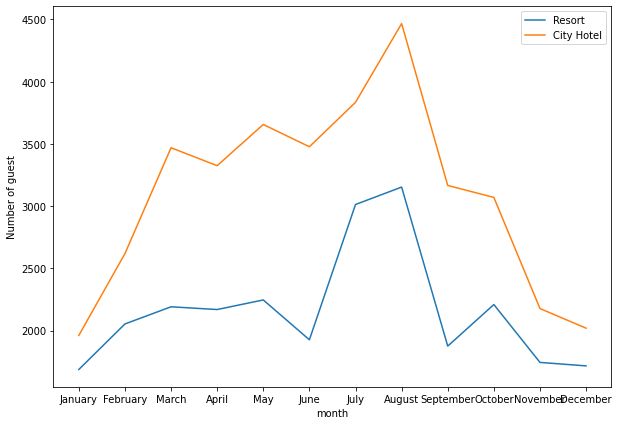

In [ ]:
# Plotting the data
sns.lineplot(data=hotel_guest, x='month', y='guests in resort hotel')
sns.lineplot(data=hotel_guest, x='month', y='guests in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.savefig('visit.png')

Most visitors come in the month of August

**Question12: Which month produces highest adr?**

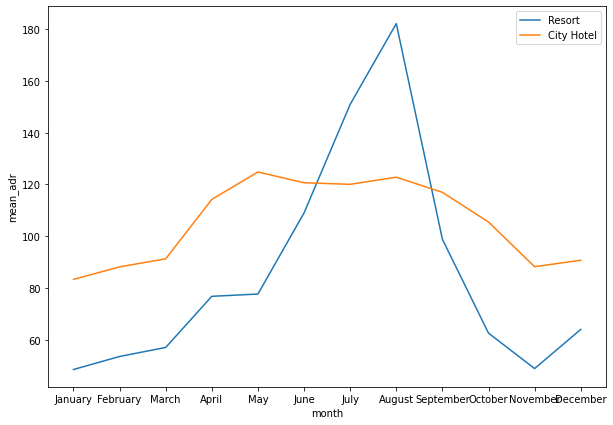

In [ ]:
hotel_resort_adr = hotel_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
hotel_city_adr=hotel_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
hotel_adr = hotel_resort_adr.merge(hotel_city_adr, on = 'arrival_date_month')
hotel_adr.columns = ['month', 'resort_adr', 'city_adr']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_adr['month'] = pd.Categorical(hotel_adr['month'], categories=months, ordered=True)
hotel_adr= hotel_adr.sort_values('month').reset_index()
sns.lineplot(data=hotel_adr, x='month', y='resort_adr')
sns.lineplot(data=hotel_adr, x='month', y='city_adr')
plt.legend(['Resort','City Hotel'])
plt.ylabel('mean_adr')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.savefig('adr.png')

August month produces highest adr as this is the buisest month of the year.
Now Let's check box plot for more visualization of adr with different months of year.  

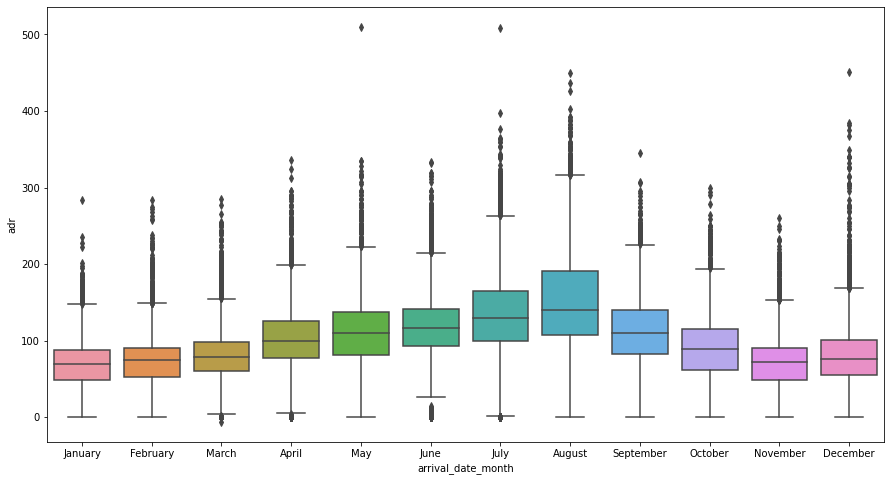

In [ ]:
hotel_df1=hotel_df.copy() # make a copy of hotel_df
# Sort the data in Jan,Feb,March,...months
months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']  
hotel_df1['arrival_date_month'] = pd.Categorical(hotel_df1['arrival_date_month'],categories=months,ordered=True)
# plotting the data
plt.figure(figsize = (15,8))
sns.boxplot(x = hotel_df1['arrival_date_month'],y = hotel_df1['adr'])
plt.savefig('x.png')
plt.show()


we can see that the average adr follows a trend as first it increases from beginning of the year and reaches at its peak in August and then decreaes to end of the year.

# **Correlation Analysis**

we don't need to check categorical columns. so we only take numerical columns for correlation

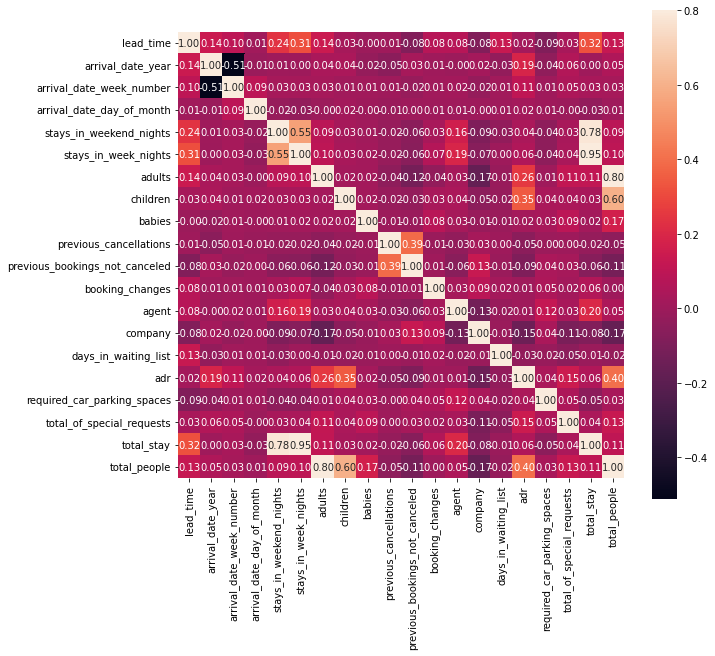

In [ ]:
#correlation matrix
cor_mat = hotel_df[num_cols].corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(cor_mat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True)
plt.savefig('corr.png')

we can conclude from above correlation matrix that:


1.   arrival_date_week_number and arrival_date_year are 51% negatively correlated.
2.   adr and children are positively correlated by 35%.
3.   adr and total_people are positively correlated by 40%.
4.   total_stay and lead time are positively correlated by 32%.
  



## **Conclusion**



*   **61% is city hotel and 39% is resort hotel.**

*   **Most People (13%) arrived in the month of August.**

* **Most preferred (78%) meal type is BB (Bed and Breakfast).**  



* **Most People (31%) are from Portugal, followed by Germany, France, etc.**

* **Most demanded room type is A.**

* **65% People reserved room A but only 53% assigned the same room.**

* **59% market segment used is online TA, followed by offline TA/TO.**

* **28% booking has got cancelled.**

* **79% distribution channel is TA/TO.**

* **26% reservations are cancelled by guests.**

* **only 4% are repeated guest.**

* **88% have reserved and assigned same room.**

* **Agent 9 has made most booking.**

* **City type hotel has slightly higher mean_adr than resort type hotel. Therefore, city type hotel is making more revenue.**

* **City hotel has longer waiting time as it's busier than resort hotel.** 

* **City hotel has slightly higher lead time.**

* **City type hotel has higher booking cancellation rate (30.10%) than resort type hotel (23.48%).**

* **Resort hotel has slightly higher chance that its customers will return for another stay.**

* **Room types H, G and C are better adr rooms.**

* **Most common stay length is less than 4  days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.**

* **TA/TO channel has longest average waiting time. Therefore customer booked through TA/TO channel have to wait a little longer to confirm booking of rooms.**

* **TA/TO channel has longest  lead time. So customer using TA/TO channel planned their visit ahead of time.** 

* **TA/TO type channel has highest (~30%) booking cancellation rate.**

* **Most visitors come in the month of August.**

* **August month produces highest adr as this is the busiest month of the year.**

* **Within the year, average adr follows a trend as first it increases from beginning of the year and reaches at its peak in August and then decreases to end of the year.**

* **adr and total_people are positively correlated by 40%.**

* **total_stay and lead time are positively correlated by 32%.**

* **adr and children are positively correlated by 35%.**









